In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime
from citipy import citipy
from scipy.stats import linregress

In [3]:
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

In [5]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name, citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

inirida co
cape town za
san quintin mx
tura ru
bilma ne
carnarvon au
hobart au
rikitea pf
avarua ck
buraydah sa
carnarvon au
ushuaia ar
norman wells ca
leningradskiy ru
kutum sd
mataura pf
ushuaia ar
rikitea pf
atuona pf
barentsburg sj
moranbah au
illoqqortoormiut gl
terney ru
victoria sc
rikitea pf
saint george bm
bilibino ru
cape town za
birakan ru
ushuaia ar
alofi nu
krasnoborsk ru
arraial do cabo br
cape town za
kaitangata nz
atuona pf
belushya guba ru
ituiutaba br
rikitea pf
okha ru
ushuaia ar
mrirt ma
erenhot cn
nikolskoye ru
simpang id
busselton au
rikitea pf
morro bay us
keti bandar pk
qaanaaq gl
punta arenas cl
saskylakh ru
yellowknife ca
hambantota lk
poronaysk ru
teguise es
vila velha br
juneau us
yellowknife ca
fort saint john ca
chokurdakh ru
karaul ru
punta arenas cl
castro cl
ushuaia ar
meulaboh id
taolanaro mg
butaritari ki
san cristobal ec
punta arenas cl
provideniya ru
tonstad no
suleja ng
punta arenas cl
marsh harbour bs
pakwach ug
chenzhou cn
hermanus za
chokurdakh 

lata sb
hobart au
georgetown sh
bandarbeyla so
litovko ru
shimoda jp
mar del plata ar
ushuaia ar
necochea ar
saskylakh ru
elliot lake ca
castro cl
jamestown sh
atuona pf
hermanus za
hithadhoo mv
saint-ambroise ca
arkhangelsk ru
lompoc us
tasiilaq gl
dudinka ru
mar del plata ar
khatanga ru
barrow us
avarua ck
nishihara jp
saint-philippe re
mataura pf
aasiaat gl
mar del plata ar
zlynka ua
mataura pf
provideniya ru
antalaha mg
cidreira br
katsuura jp
cape town za
mahebourg mu
chokurdakh ru
atuona pf
tuatapere nz
bluff nz
adrar dz
zhetybay kz
vaini to
airai pw
dzerzhinskoye ru
aklavik ca
rikitea pf
vostok ru
port hedland au
victoria sc
kodiak us
sile tr
anisoc gq
kenai us
kasongo-lunda cd
taolanaro mg
saleaula ws
nikolskoye ru
qaanaaq gl
cayenne gf
tamandare br
port elizabeth za
hunza pk
puerto madryn ar
albany au
rikitea pf
ushuaia ar
fort nelson ca
mount vernon us
punta arenas cl
muros es
busselton au
mount gambier au
qaqortoq gl
mataura pf
rikitea pf
hithadhoo mv
buluang ph
aketi cd
leb

hasaki jp
nanortalik gl
hilo us
wellington us
port elizabeth za
baruun-urt mn
bredasdorp za
sumbe ao
hilo us
accra gh
lompoc us
kenora ca
san cristobal ec
tsihombe mg
bonavista ca
faya td
bredasdorp za
bredasdorp za
ushuaia ar
sesheke zm
broome au
sochi ru
bambous virieux mu
nikolskoye ru
raiganj in
cherskiy ru
saskylakh ru
guaratinga br
yellowknife ca
illoqqortoormiut gl
richards bay za
kapaa us
bethel us
cidreira br
edmundston ca
la ronge ca
beira mz
upernavik gl
saint anthony ca
san ignacio bz
busselton au
gat ly
cabo san lucas mx
marsaxlokk mt
lazaro cardenas mx
dongning cn
rikitea pf
cape town za
burica pa
mahebourg mu
ribeira grande pt
ranong th
raton us
bluff nz
kavieng pg
rikitea pf
hermanus za
ilulissat gl
punta arenas cl
hermanus za
tsihombe mg
nizwa om
bredasdorp za
ust-kamchatsk ru
ushuaia ar
shitanjing cn
jumla np
iwanai jp
longyearbyen sj
fort nelson ca
busselton au
nanortalik gl
barrow us
hithadhoo mv
sabha ly
coihaique cl
vaini to
yulara au
veraval in
bethel us
taolanar

In [6]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)
cities

['inirida',
 'cape town',
 'san quintin',
 'tura',
 'bilma',
 'carnarvon',
 'hobart',
 'rikitea',
 'avarua',
 'buraydah',
 'ushuaia',
 'norman wells',
 'leningradskiy',
 'kutum',
 'mataura',
 'atuona',
 'barentsburg',
 'moranbah',
 'illoqqortoormiut',
 'terney',
 'victoria',
 'saint george',
 'bilibino',
 'birakan',
 'alofi',
 'krasnoborsk',
 'arraial do cabo',
 'kaitangata',
 'belushya guba',
 'ituiutaba',
 'okha',
 'mrirt',
 'erenhot',
 'nikolskoye',
 'simpang',
 'busselton',
 'morro bay',
 'keti bandar',
 'qaanaaq',
 'punta arenas',
 'saskylakh',
 'yellowknife',
 'hambantota',
 'poronaysk',
 'teguise',
 'vila velha',
 'juneau',
 'fort saint john',
 'chokurdakh',
 'karaul',
 'castro',
 'meulaboh',
 'taolanaro',
 'butaritari',
 'san cristobal',
 'provideniya',
 'tonstad',
 'suleja',
 'marsh harbour',
 'pakwach',
 'chenzhou',
 'hermanus',
 'asau',
 'faya',
 'kaka',
 'dakoro',
 'divnogorsk',
 'sitka',
 'wazzan',
 'barcelos',
 'kushmurun',
 'jerecuaro',
 'bluff',
 'honiara',
 'hithadhoo'

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | kenai
Processing Record 3 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | naze
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | jiaozuo
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | sobolevo
Processing Record 14 of Set 1 | abu samrah
Processing Record 15 of Set 1 | zhigansk
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | rungata
City not found. Skipping...
Processing Record 21 of Set 1 

Processing Record 37 of Set 4 | chik
Processing Record 38 of Set 4 | puro
Processing Record 39 of Set 4 | qaanaaq
Processing Record 40 of Set 4 | kaeo
Processing Record 41 of Set 4 | ambunti
Processing Record 42 of Set 4 | barbar
City not found. Skipping...
Processing Record 43 of Set 4 | lac du bonnet
Processing Record 44 of Set 4 | sanford
Processing Record 45 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 46 of Set 4 | merauke
Processing Record 47 of Set 4 | rawson
Processing Record 48 of Set 4 | moerai
Processing Record 49 of Set 4 | ilulissat
Processing Record 50 of Set 4 | oregon city
Processing Record 1 of Set 5 | ostersund
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | ishinomaki
Processing Record 4 of Set 5 | grand forks
Processing Record 5 of Set 5 | thompson
Processing Record 6 of Set 5 | camocim
Processing Record 7 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 5 | zhezkazgan
Processing Record 9 

Processing Record 28 of Set 8 | sorong
Processing Record 29 of Set 8 | dicabisagan
Processing Record 30 of Set 8 | grindavik
Processing Record 31 of Set 8 | bom jesus da lapa
Processing Record 32 of Set 8 | desterro
Processing Record 33 of Set 8 | fairbanks
Processing Record 34 of Set 8 | port macquarie
Processing Record 35 of Set 8 | montrose
Processing Record 36 of Set 8 | karaton
Processing Record 37 of Set 8 | rafaela
Processing Record 38 of Set 8 | halmstad
Processing Record 39 of Set 8 | ketchikan
Processing Record 40 of Set 8 | frederico westphalen
Processing Record 41 of Set 8 | camacha
Processing Record 42 of Set 8 | eureka
Processing Record 43 of Set 8 | laguna
Processing Record 44 of Set 8 | stonewall
Processing Record 45 of Set 8 | lalsot
Processing Record 46 of Set 8 | villarrica
Processing Record 47 of Set 8 | moroeni
Processing Record 48 of Set 8 | tiznit
Processing Record 49 of Set 8 | tual
Processing Record 50 of Set 8 | kavaratti
Processing Record 1 of Set 9 | te horo

Processing Record 16 of Set 12 | shelburne
Processing Record 17 of Set 12 | phimai
Processing Record 18 of Set 12 | khor
Processing Record 19 of Set 12 | a
City not found. Skipping...
Processing Record 20 of Set 12 | marcona
City not found. Skipping...
Processing Record 21 of Set 12 | santa rosalia
Processing Record 22 of Set 12 | xining
Processing Record 23 of Set 12 | nadym
Processing Record 24 of Set 12 | hvolsvollur
Processing Record 25 of Set 12 | kizema
Processing Record 26 of Set 12 | yeppoon
Processing Record 27 of Set 12 | cotonou
Processing Record 28 of Set 12 | california city
Processing Record 29 of Set 12 | kathmandu
Processing Record 30 of Set 12 | havelock
Processing Record 31 of Set 12 | jiazi
Processing Record 32 of Set 12 | ames
Processing Record 33 of Set 12 | yuci
Processing Record 34 of Set 12 | catuday
Processing Record 35 of Set 12 | teruel
Processing Record 36 of Set 12 | lokosovo
Processing Record 37 of Set 12 | duz
City not found. Skipping...
Processing Record

In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hasaki,35.73,140.83,79.00,94,75,9.17,JP,2020-08-30 22:35:26
1,Kenai,60.55,-151.26,61.00,51,75,10.29,US,2020-08-30 22:35:26
2,Ushuaia,-54.80,-68.30,28.40,92,40,24.16,AR,2020-08-30 22:35:26
3,Naze,28.37,129.48,84.20,83,75,16.11,JP,2020-08-30 22:35:27
4,Albany,42.60,-73.97,72.00,46,0,5.93,US,2020-08-30 22:35:27
5,Hermanus,-34.42,19.23,39.00,89,3,13.60,ZA,2020-08-30 22:35:27
6,Rikitea,-23.12,-134.97,69.17,82,27,18.07,PF,2020-08-30 22:35:27
7,Kodiak,57.79,-152.41,55.40,87,90,13.87,US,2020-08-30 22:35:28
8,Jiaozuo,35.24,113.23,75.85,64,8,7.63,CN,2020-08-30 22:35:28
9,Mataura,-46.19,168.86,59.31,47,39,14.14,NZ,2020-08-30 22:35:29


In [9]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hasaki,JP,2020-08-30 22:35:26,35.73,140.83,79.00,94,75,9.17
1,Kenai,US,2020-08-30 22:35:26,60.55,-151.26,61.00,51,75,10.29
2,Ushuaia,AR,2020-08-30 22:35:26,-54.80,-68.30,28.40,92,40,24.16
3,Naze,JP,2020-08-30 22:35:27,28.37,129.48,84.20,83,75,16.11
4,Albany,US,2020-08-30 22:35:27,42.60,-73.97,72.00,46,0,5.93
...,...,...,...,...,...,...,...,...,...
540,Teruel,ES,2020-08-30 22:38:08,40.67,-0.67,64.40,62,0,5.82
541,Lokosovo,RU,2020-08-30 22:38:09,61.13,74.82,58.15,97,94,6.85
542,Lalibela,ET,2020-08-30 22:38:09,12.03,39.03,55.94,83,88,1.12
543,Krutaya Gorka,RU,2020-08-30 22:38:09,55.36,73.22,59.00,67,30,4.47


In [10]:
# Create the output file (CSV).
output_data_file = "Weather_Data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plotting the data

In [15]:
lats = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
import time

In [17]:
today = time.strftime('%x')
today

'08/30/20'

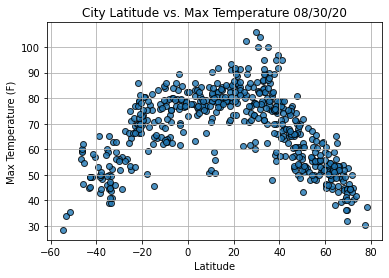

In [18]:
plt.scatter(lats, max_temp, edgecolor="black", linewidths=1, alpha=0.8, label='Cities', marker='o')
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('Weather_Data/fig1.png')
plt.show()

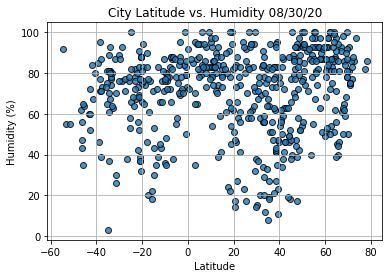

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

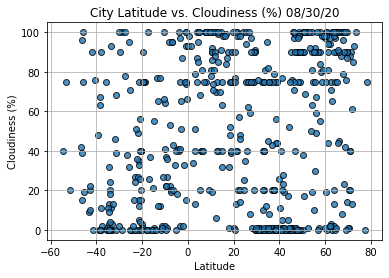

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

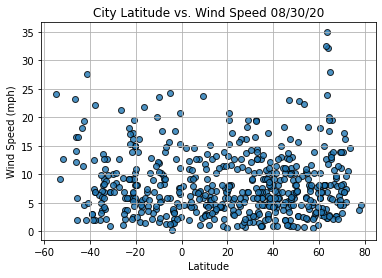

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Linear Regression

In [31]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [32]:
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

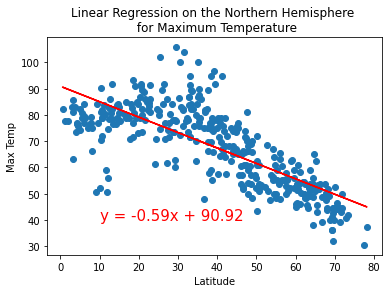

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

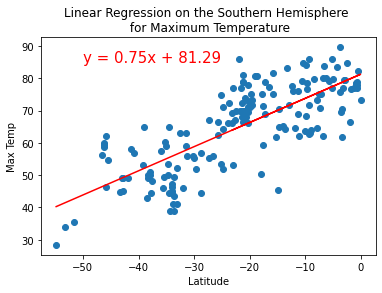

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,85))

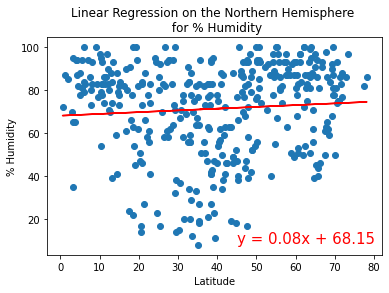

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,9))

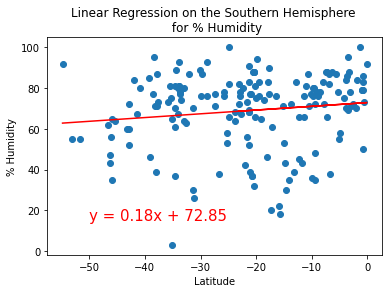

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

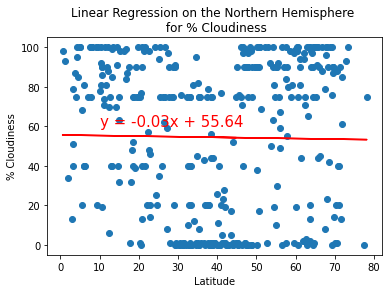

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,60))

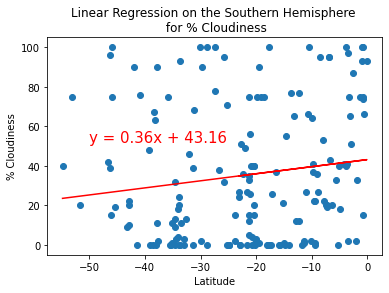

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,52))

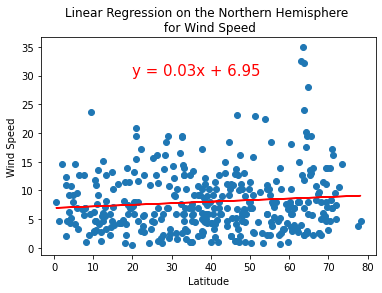

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,30))

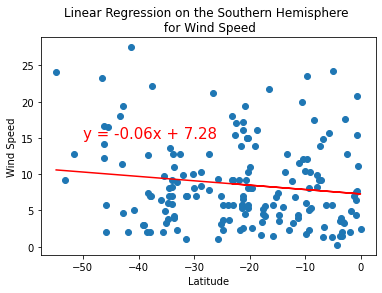

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,15))